# Natural Language Processing (NLP) Theory

Read Wikipedia Article on Natural Language Processing

* This is where NLP can help
    * Use cases with a lot of text or unstructured text data
    * Imagine you work for Google News and you want to group articles by topic
    * Or you work for  legal firm and you need to sift through thousands of pagesof legal docs to find relevant ones
* We'll want to 
    * Compile documents
    * Featurize them (get features from them)
    * Compare their features
    * e.g. You have 2 docs
        * "Blue House"
        * "Red House"
        * Featurize based on word count i.e change doc in to vectorized word counts
            * "Blue House" -> (red, blue, house) -> (0,1,1)
            * "Red House" -> (red, blue, house) -> (1,0,1)
* A document represented as a vector of word counts is called a "bag of words"
* Each document is a vector of features
* You can use cosine similarity on the vectors to determine similarity
    * \begin{equation*} sim(A,B) = \cos(\theta) = \frac{A\cdot B}{\|A\|\|B\|} \end{equation*}
* We can improve on Bag of Words by adjusting word counts based on their frequency in corpus (the group of all the documents)
* We can use the **TF-IDF (Term Frequency - Inverse Document Frequency)
* **Term Frequency** = importance of the term within that document
    * TF(d,t) = Number of occurances of term *t* in document *d*
* **Inverse Document Frequency** = importance of the term in the corpus
    * IDF(t) = log(D/t) where
        * D = total number of docs
        * t = number of docs with the term
* Mathematically, TF-IDF is then expressed as:
    *\begin{equation*} W_{x,y} = tf_{x,y} \log(\frac{N}{df_{x}}) \end{equation*}
    * Where
        * term x within document y
        * $tf_{x,y}$ = frequency of x in y
        * $df_{x}$ = number of docs containing x
        * N = total number of docs
* The reason we do this is so that we can get not just a word count but also some sort of notation on how important a word is not just relevant to the document but to the entire corpus of all the documents


___
# NLP (Natural Language Processing) with Python

This is the notebook that goes along with the NLP video lecture!

In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

We'll go ahead and start our example by building a spam filter.

Once you've completed this lecture you'll have a project using some Yelp Text Data!
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**

    conda install -c anaconda nltk


In [ ]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA
# WATCH THE VIDEO FOR FULL INSTRUCTIONS ON THIS STEP

# Uncomment the code below and run:


# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

In [1]:
import nltk

In [3]:
# NLTK comes with datasets
nltk.download_shell()
# l to list datasets
# d to download
# downloads to C:\Users\Sajakhta\AppData\Roaming\
# q to quit shell

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\Sajakhta\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## Get the Data

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

Text categorized as Spam or Ham.
We'll use this dataset to create spam detection filter.


The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [4]:
# list comprehension
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
len(messages)

5574

In [6]:
messages[0]
# '\t' tab separated col1: spam or hamm, col2: message

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
messages[5573]

'ham\tRofl. Its true to its name'

In [20]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [28]:
for mess_no, message in enumerate(messages[:5]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

From the official SciKit Learn documentation, we can visualize our process:

<img src='http://www.astroml.org/sklearn_tutorial/_images/plot_ML_flow_chart_3.png' width=600/>

Instead of parsing TSV manually using Python, we can just take advantage of pandas! Let's go ahead and import it!

In [29]:
import pandas as pd

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [30]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [31]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [32]:
messages.describe()
# duplicate messages exists

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [33]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general. I encourage you to read up on the topic!

Let's make a new column to detect how long the text messages are:

In [35]:
# feature engineering is a large part of spam detection
# https://en.wikipedia.org/wiki/Feature_engineering
messages['length'] = messages['message'].apply(len)

In [36]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization
Let's visualize this! Let's do the imports:

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
sns.set_style('darkgrid')

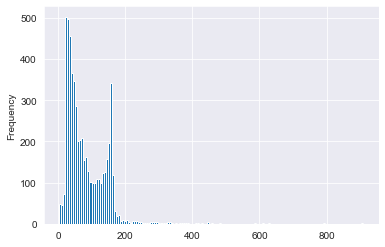

In [45]:
messages['length'].plot.hist(bins=150)
# bimodal distribution

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 1000ish, this must mean that there is some really long message!

In [47]:
messages['length'].describe()
# max length is 910 characters

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Woah! 910 characters, let's use masking to find this message:

In [52]:
messages[messages['length'] == 910]['message'].iloc[0]
# use .iloc[0] to print entire string
# weird love letter!

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000288C4F49C88>,
      dtype=object)

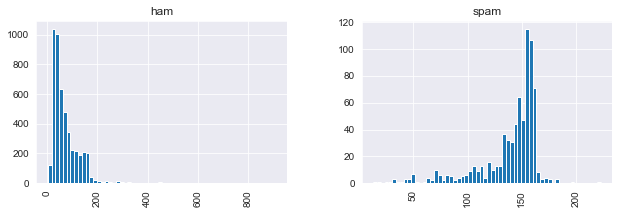

In [54]:
# pandas own version of seaborn facet grid
messages.hist(column='length', by='label', bins=60, figsize=(10,3))
# spam messages tend to have more characters
# spam is right skewed
# ham is left skewed

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [55]:
import string

In [63]:
# example of how this will work
mess =  'Sample message! Notice: it has punctuation.'

In [64]:
# string of punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
# use list comprehension to remove punctuation
nopunc = [c for c in mess if c not in string.punctuation]

In [74]:
nopunc = ''.join(nopunc)

In [75]:
nopunc

'Sample message Notice it has punctuation'

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [67]:
from nltk.corpus import stopwords

In [70]:
# english stopwords only
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [78]:
# remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [80]:
clean_mess
# this leaves the important words only

['Sample', 'message', 'Notice', 'punctuation']

Now let's put both of these together in a function to apply it to our DataFrame later on:

In [81]:
def text_process(mess):
    """
    mess paramater, string
    1. remove punctuation
    2. remove stop words
    3. return list of clean words
    """
    # remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove stop words
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # return clean message
    return clean_mess    

Here is the original DataFrame again:

In [83]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

**Note:**
We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)

In [85]:
# Check tex_process function to make sure its working
messages['message'].head().apply(text_process)
# looks to be working fine

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

e.g. consider 'run', 'running', 'ran' as the same word through Stemming.

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

**We'll do that in three steps using the bag-of-words model:**

1. Count how many times does a word occur in each message (Known as term frequency,TF)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency, IDF)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts (bag of words model).

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

Sparse Matrices are a way to deal with lots of zero values to save on computer memory.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the analyzer to be our own previously defined function:

In [94]:
# bag of words tranformer using our text_processor function, fit to our messages data
# might take a while as we're creating a very large matrix
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [95]:
# total numbe of vocab words
len(bow_transformer.vocabulary_)


11425

Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [97]:
# get 4th message in message DF
mess4 = messages['message'][3]

In [98]:
mess4

'U dun say so early hor... U c already then say...'

Now let's see its vector representation:

In [101]:
bow4 = bow_transformer.transform([mess4])

In [103]:
print(bow4)
# 7 unique words in mess4, after removing punctuation and stop words
# 2 words appear twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [105]:
bow4.shape
# 1 col by entire vocab of rows

(1, 11425)

This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [106]:
bow_transformer.get_feature_names()[4068]
# 'U' shows up twice

'U'

In [108]:
bow_transformer.get_feature_names()[9554]
# 'say' shows up twice

'say'

Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [109]:
# may take a while
messages_bow = bow_transformer.transform(messages['message'])

In [110]:
print('Shape of the Sparse Matrix: ', messages_bow.shape)
# 5752 rows, 11425 cols

Shape of the Sparse Matrix:  (5572, 11425)


In [111]:
print('Amount of none zero occurances: ', messages_bow.nnz)

Amount of none zero occurances:  50548


In [112]:
# calculate Sparcity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

In [115]:
print('sparsity: {}'.format(round(sparsity,4)))

sparsity: 0.0794


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [116]:
from sklearn.feature_extraction.text import TfidfTransformer

In [117]:
# make an instance of TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [118]:
# fit it it to messages bag of words
tfidf_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [119]:
# transform bag of words for message 4 as an example for a single message
tfidf4 = tfidf_transformer.transform(bow4)
# converted a simple wordcound into a TF-IDF i.e. a weight for each word

In [121]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [125]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

3.2800524267409408

In [126]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [127]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [129]:
messages_tfidf.shape

(5572, 11425)

There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
# create instance and fit of MultinomialNB
spam_dectect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [132]:
# for message 4 - predict Spam or Ham
spam_dectect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [133]:
# check actual label for message 4
messages.label[3]
# prediction ham is correct

'ham'

In [136]:
print('Predicted: ', spam_dectect_model.predict(tfidf4)[0])
print('Expected: ', messages.label[3])

Predicted:  ham
Expected:  ham


Fantastic! We've developed a model that can attempt to predict spam vs ham classification!

## Part 6: Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [137]:
all_predictions = spam_dectect_model.predict(messages_tfidf)

In [139]:
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


*We should really split our data in to training and test sets, else we don't know the true predictive nature of our model*

We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.30)

In [144]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [145]:
print(len(label_train), len(label_test), len(label_train) + len(label_test))

3900 1672 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

***Rather than going through the entire process of calculating TF-IDF for the test set as we did earlier for the entire dataset, we can use the Sklearn's Data Pipeline feature, which saves us having to do all the steps we previously did.***

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [147]:
from sklearn.pipeline import Pipeline

In [148]:
# create instance of pipeline and pass in a LIST of all the steps we want to take
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # bag of words, strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [149]:
# treate pipeline as a normal estimator
# pipeline does all the preprocessing
# fit train data to pipeline
# may take some time
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000288CA8BE438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [152]:
# predict labels for test data
predictions = pipeline.predict(msg_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix 

In [153]:
# Classification Report
print('Confusion Matrix')
print(confusion_matrix(label_test, predictions))
print('\n')
print('Classification Report')
print(classification_report(label_test, predictions))
# TN, FN
# FP, TP
# 96% accuracy, and high precision and recall for ham labels
# no false negatives, so all spam is classified as such
# quite a few false postives to legit ham SMS are classfied wrongly as spam

Confusion Matrix
[[1450    0]
 [  71  151]]


Classification Report
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1450
        spam       1.00      0.68      0.81       222

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [154]:
# can use different classfier instead of Naive Bayes MultinomialNB() e.g. Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [155]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # bag of words, strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()) # train on TF-IDF vectors w/ Random Forest
])

In [156]:
pipeline_rf.fit(msg_train, label_train)

C:\Users\Sajakhta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000288CA8BE438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [159]:
predictions_rf = pipeline_rf.predict(msg_test)

In [161]:
# Classification Report for Random Forest Classifier
print('Confusion Matrix')
print(confusion_matrix(label_test, predictions_rf))
print('\n')
print('Classification Report')
print(classification_report(label_test, predictions_rf))
# TN, FN
# FP, TP
# 97% accuracy, and high precision and recall for ham labels
# no false negatives, so all spam is classified as such
# F1 score and recall improved for spam class
# fewer few false postives than in Naive Bayes
# Random Forest seems to beat Naive Bayes

Confusion Matrix
[[1450    0]
 [  50  172]]


Classification Report
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1450
        spam       1.00      0.77      0.87       222

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here, and its vast expanse of topic could fill up several college courses! I encourage you to check out the resources below for more information on NLP!

## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)